c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current f

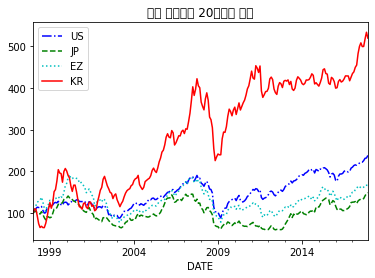

In [18]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt


symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]


data = pd.DataFrame()
for sym in symbols:
    
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [20]:
#https://datascienceschool.net/02%20mathematics/03.05%20PCA.html
# df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
# print(df.iloc[:, :5])